
# Project: Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description

> This is an analysis done on TMDB movies dataset. The dataset contains 10866 rows and 21 columns (id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview, runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj)

### Questions for Analysis

> - What are the top 10 years with the most number of movies released?
- What are the top 10 years with the least number of movies released?
- Which genre is the most popular over the years?
- Is there a correlation between revenue and popularity?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
movies = pd.read_csv('tmdb-movies.csv')
pd.set_option('display.max_columns', None)
movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
movies.duplicated(subset=['id','imdb_id', 'original_title']).sum()

1

In [7]:
zero_data=movies[(movies.revenue == 0)|(movies.budget == 0)|(movies.runtime == 0)]
zero_data.shape

(7011, 21)

### Quality Issue
- release_data does not have the correct datatype
- duplicates
- Few unimportant columns
- null values
- the data contain zeros in revenue_adj,budget_adj,runtime

## Data Cleaning

In [8]:
#create a duplicate of the dataset before cleaning
movies_clean = movies.copy()

In [9]:
#Define: Change 'release_date' datatype to datetime datatype
#code:
movies_clean['release_date'] = pd.to_datetime(movies_clean['release_date'])

#Test
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

In [10]:
#Define: Drop duplicates
#code:
movies_clean.drop_duplicates(inplace = True)

In [11]:
#test
movies_clean.duplicated(subset=['id','imdb_id', 'original_title']).sum()

0

In [12]:
#define: drop unimportant columns
#code:
movies_clean.drop(['imdb_id','homepage','tagline', 'keywords','overview'],axis =1,inplace = True)

In [13]:
#test
movies_clean.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [14]:
#define: zero data
#code
zero_data=movies_clean[(movies_clean.revenue == 0)|(movies_clean.budget == 0)|(movies_clean.runtime == 0)]
movies_clean.drop(zero_data.index,inplace=True)
#test
zero_data=movies_clean[(movies_clean.revenue == 0)|(movies_clean.budget == 0)|(movies_clean.runtime == 0)]
zero_data.shape

(0, 16)

In [15]:
#drop null
#code
movies_clean.dropna(axis=1)
#test
movies_clean.isnull().sum()

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (What are the top 10 years with the most number of movies released?)

In [16]:
# Numerical Representation
movies_clean.release_year.value_counts().head(10)

2011    199
2013    180
2010    178
2009    174
2006    169
2008    167
2014    165
2007    165
2005    163
2015    160
Name: release_year, dtype: int64

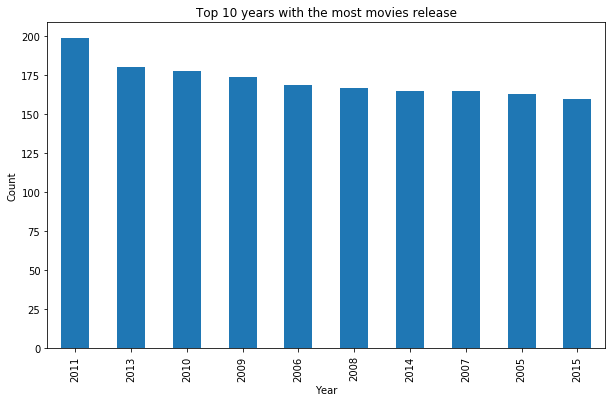

In [17]:
# Graphical Representation
movies_clean.release_year.value_counts().head(10).plot(kind= 'bar', figsize=(10,6));
plt.title("Top 10 years with the most movies release");
plt.xlabel("Year");
plt.ylabel("Count");

These are the top 10 years with most numbers of movies released, also showing 2011 as the number one.

## Research Question 2 (What are the top 10 years with the least number of movies released?)

In [18]:
#numerical representation
movies_clean.release_year.value_counts().tail(10)

1975    9
1968    9
1972    8
1964    7
1962    7
1963    6
1965    5
1966    5
1960    5
1969    4
Name: release_year, dtype: int64

Text(0, 0.5, 'Count')

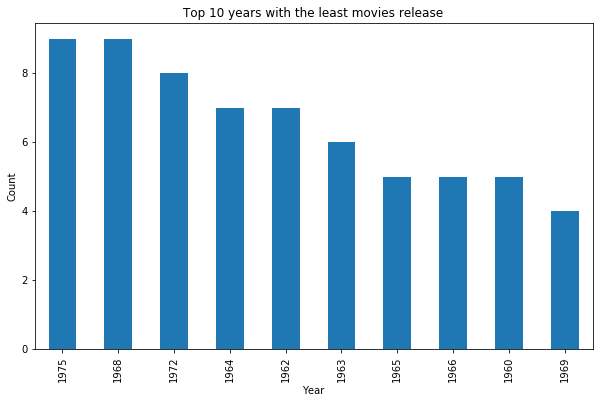

In [19]:
movies_clean.release_year.value_counts().tail(10).plot.bar(figsize=(10,6));
plt.title("Top 10 years with the least movies release")
plt.xlabel("Year")
plt.ylabel("Count")

These are the top 10 years with the least number of movies released, also showing 1969 having the least number.

## Research Question 3 (Which genre is the most popular over the years?)

In [20]:
#group the years into decades
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s','1970s','1980s','1990s','2000s','2010s']
movies_clean['release_decade'] = pd.cut(movies_clean.release_year, bins_edges, labels = bins_names)

In [21]:
movies_clean.release_decade.value_counts()

2000s    1532
2010s     862
1990s     808
1980s     425
1970s     145
1960s      77
Name: release_decade, dtype: int64

In [22]:
#function to seperate cells with '|' in them
def seprate_values(col):
    new_cols=(movies_clean[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols

In [23]:
movies_genre = seprate_values('genres')

In [24]:
movies_clean['genres']=movies_genre['genres_1']

In [25]:
movies_clean.groupby(["release_decade","genres"])['popularity'].size().unstack()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_decade,,,,,,,,,,,,,,,,,,,
1960s,12.0,15.0,1.0,10.0,6.0,NaN,18.0,1.0,NaN,2.0,3.0,2.0,1.0,NaN,1.0,NaN,NaN,1.0,4.0
1970s,28.0,15.0,2.0,18.0,12.0,NaN,34.0,1.0,2.0,NaN,18.0,2.0,2.0,1.0,7.0,NaN,2.0,NaN,1.0
1980s,73.0,51.0,5.0,83.0,17.0,3.0,71.0,4.0,21.0,NaN,52.0,4.0,1.0,4.0,20.0,NaN,13.0,3.0,NaN
1990s,159.0,53.0,16.0,174.0,43.0,2.0,184.0,7.0,29.0,4.0,52.0,5.0,9.0,19.0,18.0,1.0,31.0,1.0,1.0
2000s,269.0,128.0,44.0,351.0,57.0,21.0,369.0,16.0,40.0,4.0,94.0,9.0,15.0,23.0,25.0,NaN,53.0,7.0,7.0
2010s,146.0,52.0,35.0,149.0,36.0,6.0,213.0,11.0,18.0,7.0,56.0,7.0,8.0,19.0,27.0,NaN,61.0,8.0,3.0


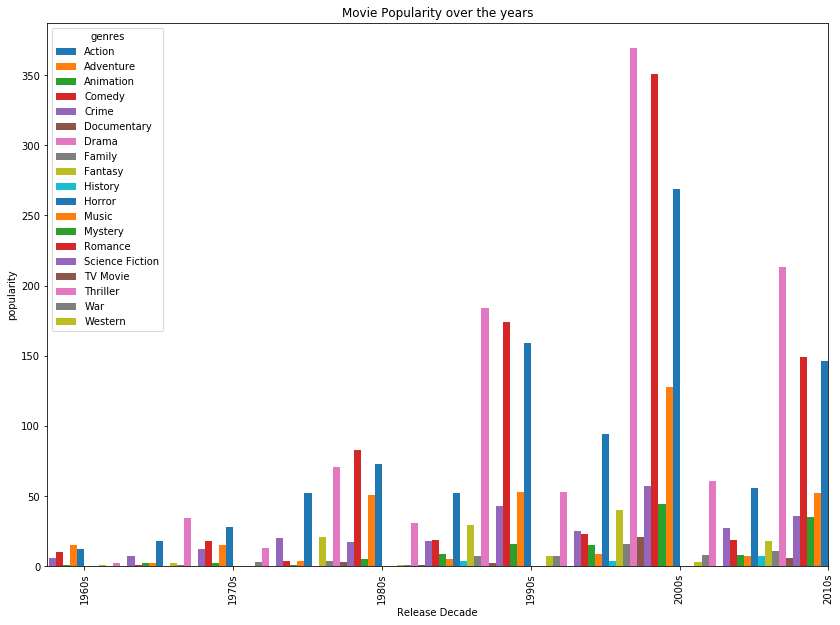

In [26]:
fig, ax = plt.subplots(figsize=(14,10))
movies_clean.groupby(["release_decade","genres"])['popularity'].size().unstack().plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('popularity');
ax.set_xlabel("Release Decade");
plt.title("Movie Popularity over the years");



Drama tops in 4 different decades

## Research Question 4 (Is there a correlation between revenue and popularity?)

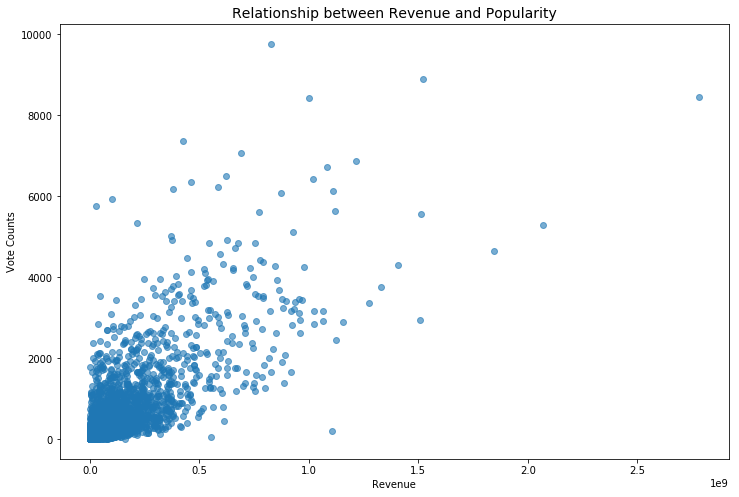

In [27]:
plt.figure(figsize = (12, 8)) # size of the figure
scatter_RP = plt.scatter(movies_clean['revenue'],
            movies_clean['vote_count'], 
            alpha = 0.6) #transparency level of points on the plot. Used to avoid overplotting
# add and format additional elements, such as titles and axis labels
plt.title("Relationship between Revenue and Popularity", 
          fontsize = 14)
plt.xlabel("Revenue",)
plt.ylabel("Vote Counts")
plt.show()

There is a positive correlation between popularity and revenue

<a id='conclusions'></a>
## Conclusions
### Limitations
1. The dataset contain a little over 10000 row, and after removing the zero data the rows fell to 7000+, this is insufficient to draw precise conclusions from.
2. Too many irrelevant columns.
3. Too manay NAN values.

### Insights
1. Movie production increases over time
2. The higher the revenue of a movie, the popular it tends to be.
3. Though people's interest in genre changed over the years, more people were still interested in drama overall.